No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


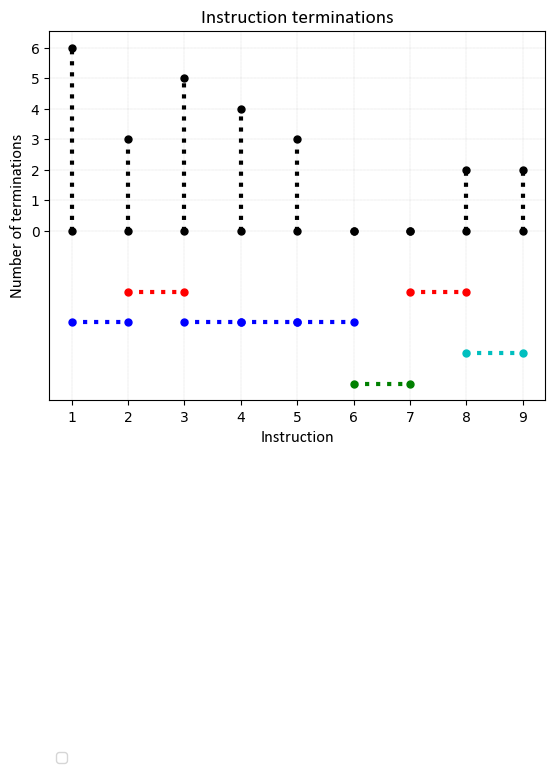

In [25]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import statistics as st
import math as mt
import random as rd
import matplotlib.patches as mpatches
import warnings

# ignore future warning
warnings.simplefilter ( action = "ignore" , category = FutureWarning )

# i used the single instruction to say if the program terminates with this last instruction

def set_graph_properties ( min_x_axis , max_x_axis , min_y_axis , max_y_axis ) :

	# set graph labels
	plt.title (
			"Instruction terminations" , fontdict = {
					"family" : "calibri" ,
					"color"  : "black" ,
					"size"   : 14
					}
			)
	plt.xlabel (
			"Instruction" , fontdict = {
					"family" : "calibri" ,
					"color"  : "black" ,
					"size"   : 12
					}
			)
	plt.ylabel (
			"Number of terminations" , fontdict = {
					"family" : "calibri" ,
					"color"  : "black" ,
					"size"   : 12
					}
			)

	# set grid property
	plt.grid ( color = "k" , linestyle = ":" , linewidth = 0.1 )

	# set legend position and configuration
	plt.legend ( loc = "lower left" , bbox_to_anchor = (0 , -1) , labelcolor = "linecolor" , ncol = 2 )

	# set ticks in the two axis
	plt.xticks ( np.arange ( mt.floor ( min_x_axis ) , mt.ceil ( max_x_axis ) + 1 , step = 1 ) )
	plt.yticks ( np.arange ( mt.floor ( min_y_axis ) , mt.ceil ( max_y_axis ) + 1 , step = 1 ) )

	# draw graph
	plt.show ( )

# function used to check if the input data are correct
def check_input_data ( x_axis_values , y_axis_values ) :

	# if the array with the instructions is empty
	if len ( x_axis_values ) <= 0 :
		return False

	# for each instruction
	for actual_instruction in x_axis_values :

		# check that it must be greater then 0
		if actual_instruction < 0 :
			return False

	# for each instruction termination
	for actual_instruction in y_axis_values :

		# check if the actual instruction termination is in the first input array
		if actual_instruction not in x_axis_values :
			return False

	# input data correct
	return True

# function used to get occurrences of terminations for each instruction
def get_number_terminations_each_instruction ( y_axis_values ) :
	pass

# function used to get min and max for the two axis respect input data
def get_min_max_values_two_axis_and_occurrences_array ( x_axis_values , y_axis_values ) :

	# find min and max of input instruction number
	min_x_axis = np.min ( x_axis_values )
	max_x_axis = np.max ( x_axis_values )

	# create occurrences array
	occurrences_instruction_terminations = np.zeros ( max_x_axis )

	# for each termination
	for actual_termination in y_axis_values :

		# increment actual index
		occurrences_instruction_terminations [ actual_termination - 1 ] += 1

	# find min and max of number termination
	min_y_axis = np.min ( occurrences_instruction_terminations )
	max_y_axis = np.max ( occurrences_instruction_terminations )

	# return min and max for the two axis
	return min_x_axis , max_x_axis , min_y_axis , max_y_axis , occurrences_instruction_terminations

# function used to plot number of terminations for each instruction
def plot_number_terminations_each_instruction ( min_y_axis , x_axis_values , occurrences_instruction_terminations ) :

	# for each instruction
	for actual_instruction in x_axis_values :

		# plot the number of termination
		plt.plot (
				[ actual_instruction , actual_instruction ] , [ min_y_axis , occurrences_instruction_terminations [ actual_instruction - 1 ] ] ,
				marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "k" , markerfacecolor = "k" , color = "k" , markersize = 5
				)

# function used to # plot line where number of terminations is going up or down or stationary
def plot_number_termination_go_up_down_stationary ( min_y_axis , x_axis_values , occurrences_instruction_terminations ) :

	# for each instruction
	for i in range ( 1 , len ( x_axis_values ) ) :

		# if the actual line between previous point and the actual one is going up
		if occurrences_instruction_terminations [ i ] > occurrences_instruction_terminations [ i - 1 ] :

			# plot a red line because the number of terminations is going up
			plt.plot (
					[ i , i + 1 ] , [ min_y_axis - 2 , min_y_axis - 2 ] ,
					marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "r" , markerfacecolor = "r" , color = "r" , markersize = 5
					)

	# for each instruction
	for i in range ( 1 , len ( x_axis_values ) ) :

		# if the actual line between previous point and the actual one is going up
		if occurrences_instruction_terminations [ i ] < occurrences_instruction_terminations [ i - 1 ] :

			# plot a red line because the number of terminations is going up
			plt.plot (
					[ i , i + 1 ] , [ min_y_axis - 3 , min_y_axis - 3 ] ,
					marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "b" , markerfacecolor = "b" , color = "b" , markersize = 5
					)

	# for each instruction
	for i in range ( 1 , len ( x_axis_values ) ) :

		# if the actual line between previous point and the actual one is going up
		if occurrences_instruction_terminations [ i ] == occurrences_instruction_terminations [ i - 1 ] and occurrences_instruction_terminations [ i ] > 0 :

			# plot a red line because the number of terminations is going up
			plt.plot (
					[ i , i + 1 ] , [ min_y_axis - 4 , min_y_axis - 4 ] ,
					marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "c" , markerfacecolor = "c" , color = "c" , markersize = 5
					)

	# for each instruction
	for i in range ( 1 , len ( x_axis_values ) ) :

		# if the actual line between previous point and the actual one is going up
		if occurrences_instruction_terminations [ i ] == occurrences_instruction_terminations [ i - 1 ] and occurrences_instruction_terminations [ i ] == 0 :

			# plot a red line because the number of terminations is going up
			plt.plot (
					[ i , i + 1 ] , [ min_y_axis - 5 , min_y_axis - 5 ] ,
					marker = "o" , linestyle = ":" , linewidth = 3 , markeredgecolor = "g" , markerfacecolor = "g" , color = "g" , markersize = 5
					)

# input instruction code in order
x_axis_values = np.array ( [ 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ] )

# input termination instruction number
y_axis_values = np.array ( [ 3 , 5 , 1 , 2 , 4 , 1 , 9 , 2 , 1 , 3 , 1 , 3 , 5 , 8 , 9 , 4 , 4 , 3 , 2 , 1 , 5 , 8 , 4 , 1 , 3 ] )

# if the input array are correct
if check_input_data ( x_axis_values , y_axis_values ) :
	# get min and max values for the two axis respect input data
	min_x_axis , max_x_axis , min_y_axis , max_y_axis , occurrences_instruction_terminations = get_min_max_values_two_axis_and_occurrences_array ( x_axis_values , y_axis_values )

# plot number of terminations for each instruction
plot_number_terminations_each_instruction ( min_y_axis , x_axis_values , occurrences_instruction_terminations )

# plot line where number of terminations is going up or down or stationary
plot_number_termination_go_up_down_stationary ( min_y_axis , x_axis_values , occurrences_instruction_terminations )

# set all graph properties and draw the graph
set_graph_properties ( min_x_axis , max_x_axis , min_y_axis , max_y_axis )

# get occurrences of terminations for each instruction
# number_terminations_each_instruction = get_number_terminations_each_instruction ( min_y_axis, x_axis_values, occurrences_instruction_terminations )